<h1> Effective Quadratures Demo

Want something a basis set with cardinality somewhere between a total order and a tensor grid? Then a Euclidean degree [1] might be just right for you! These index sets are available in Effective Quadratures, can be used with effective quadrature subsampling. Here is quick demo in 2D

In [1]:
%matplotlib inline
from effective_quadratures.indexset import IndexSet
from effective_quadratures.parameter import Parameter
from effective_quadratures.effectivequads import EffectiveSubsampling
from effective_quadratures.plotting import scatterplot
import numpy as np

We begin by defining a Euclidean degree index set

In [4]:
# Set the parameters
order = 5
zeta_1 = Parameter(param_type="Uniform", lower=-1, upper=1, points=order+1)
zeta_2 = Parameter(param_type="Gaussian", shape_parameter_A = 3.0, shape_parameter_B=2.0 points=order+1)
params = [zeta_1, zeta_2]

# Set the basis
basis = IndexSet('Total order', [order, order])

# Declare an effective subsampling object
EQ = EffectiveSubsampling(params, basis)

# Determine leaast number of subsamples required
cardinality = EQ.least_no_of_subsamples_reqd
EQ.least_no_of_subsamples_reqd(cardinality)

# Solve for the coefficients!
x , condition_number = EQ.computeCoefficients(fun)

# And if you want to prune down the last 5 columns (coresponding to the highest total orders)
EQ.prune(5)

/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


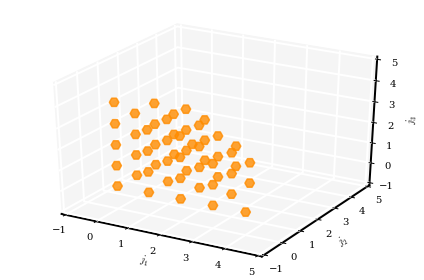

In [5]:
basis.plot('picture.png')

Ok, so now lets sketch a quick problem. Assume our complex model is given by:

In [ ]:
p = eq.tensor_quadrature_points
v1 = np.mat(p[:,0])
v1 = v1.T
v2 = np.mat(p[:,1])
v2 = v2.T
v3 = np.mat(p[:,3])
v3 = v3.T
scatterplot3D(v1, v2, v3, r'$\zeta_1$', r'$\zeta_2$', 'picture2.png', marker_type='o', color_choice='crimson')